<a href="https://colab.research.google.com/github/dhirajlaulkar/infyspring/blob/main/Doctor_Patient_Conversation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/EDA')

In [ ]:
df = pd.read_csv('gpt-4.csv', nrows=3000, on_bad_lines='skip')

In [ ]:
df=df.sample(n=1000)

In [ ]:
df.head()

,data,conversation
1507,"A 54-year-old male, with alcohol-related liver...","Doctor: Good morning, how are you feeling toda..."
2732,This is a fifty-five-year-old woman with past ...,"Doctor: Good afternoon, how are you feeling to..."
1429,A 30-year-old male presented with intermittent...,"Doctor: Hello, how can I help you today?\nPati..."
2876,A 92-year-old male patient was referred to Mat...,"Doctor: Good morning, Mr. Johnson. How are you..."
2568,A 5-year-old girl who had no previous medical ...,"Doctor: Hello, how are you feeling today?\nPat..."


Pre Processing

In [ ]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove special characters, digits, and convert to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Removes numbers and punctuation
    tokens = [word.lower() for word in tokens]  # Convert to lowercase

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the lemmatized tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text


df['clean_data'] = df['data'].apply(clean_text)
df['clean_conversation'] = df['conversation'].apply(clean_text)



,clean_data,clean_conversation
1507,male liver cirrhosis calculated model stage li...,doctor good morning feeling today patient hmm ...
2732,woman past appendectomy perimenopausal treatme...,doctor good afternoon feeling today patient fe...
1429,male presented intermittent progressive pain r...,doctor hello help today patient hi presented i...
2876,male patient referred matsue city hospital tre...,doctor good morning johnson feeling today pati...
2568,girl previous medical history admitted hospita...,doctor hello feeling today patient feeling oka...


In [ ]:
df['clean_data'] = df['data'].apply(clean_text)
df['clean_conversation'] = df['conversation'].apply(clean_text)

In [ ]:
df[['clean_data', 'clean_conversation']].head()

,clean_data,clean_conversation
1507,male liver cirrhosis calculated model stage li...,doctor good morning feeling today patient hmm ...
2732,woman past appendectomy perimenopausal treatme...,doctor good afternoon feeling today patient fe...
1429,male presented intermittent progressive pain r...,doctor hello help today patient hi presented i...
2876,male patient referred matsue city hospital tre...,doctor good morning johnson feeling today pati...
2568,girl previous medical history admitted hospita...,doctor hello feeling today patient feeling oka...


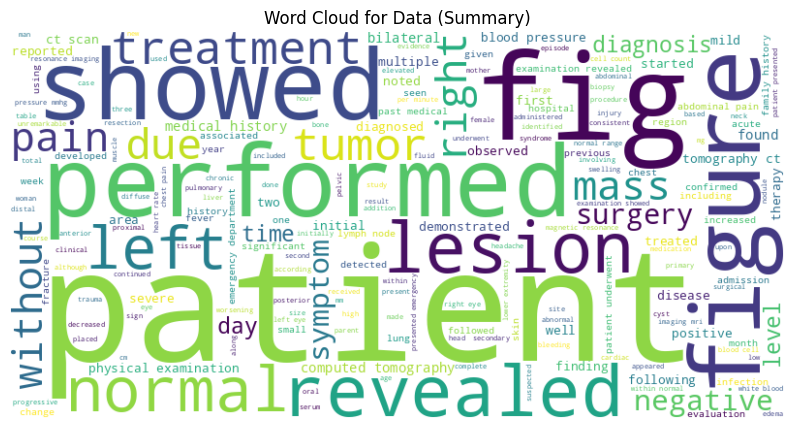

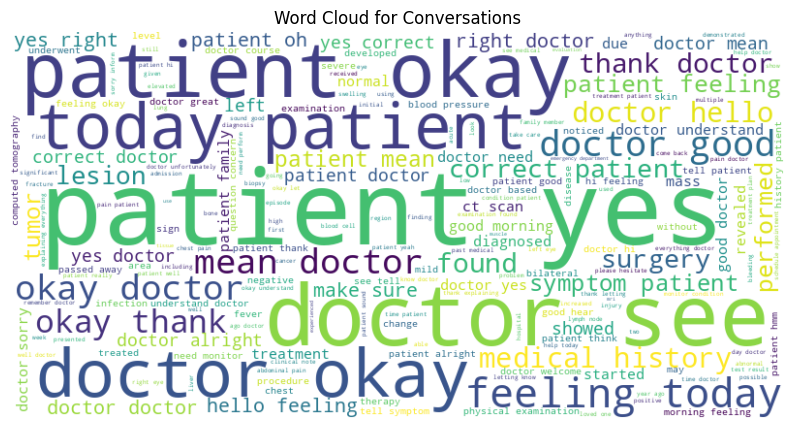

In [ ]:
wordcloud_data = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_data']))

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_data, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Data (Summary)')
plt.show()

# Generate a word cloud for the 'clean_conversation' column
wordcloud_convo = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_conversation']))

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_convo, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Conversations')
plt.show()

Problem Statement: Identify frequency of symptoms, treatments and recovery outcomes based on sentiments

<ipython-input-51-cf25a4743ab0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symptom', y='Frequency', data=symptom_df, palette='viridis')


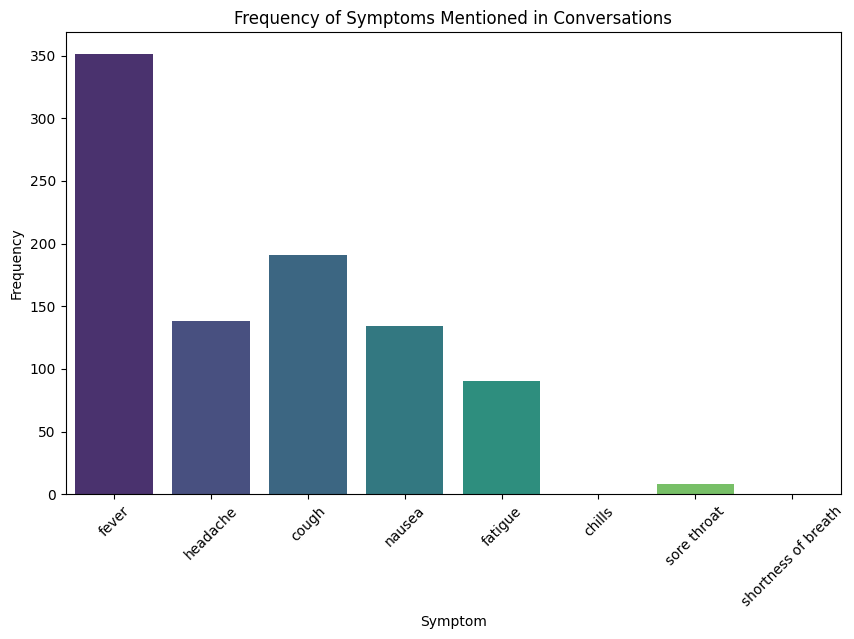

In [ ]:
# Define a list of known symptoms
known_symptoms = ['fever', 'headache', 'cough', 'nausea', 'fatigue', 'chills', 'sore throat', 'shortness of breath']

# Count the occurrence of these symptoms in the 'clean_data' and 'clean_conversation' columns
symptom_counts = {symptom: df['clean_data'].str.contains(symptom).sum() + df['clean_conversation'].str.contains(symptom).sum() for symptom in known_symptoms}

# Convert the result into a DataFrame for visualization
symptom_df = pd.DataFrame(list(symptom_counts.items()), columns=['Symptom', 'Frequency'])

# Plot the frequency of symptoms
plt.figure(figsize=(10,6))
sns.barplot(x='Symptom', y='Frequency', data=symptom_df, palette='viridis')
plt.title('Frequency of Symptoms Mentioned in Conversations')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-f5b59805608d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Treatment', y='Frequency', data=treatment_df, palette='Blues_d')


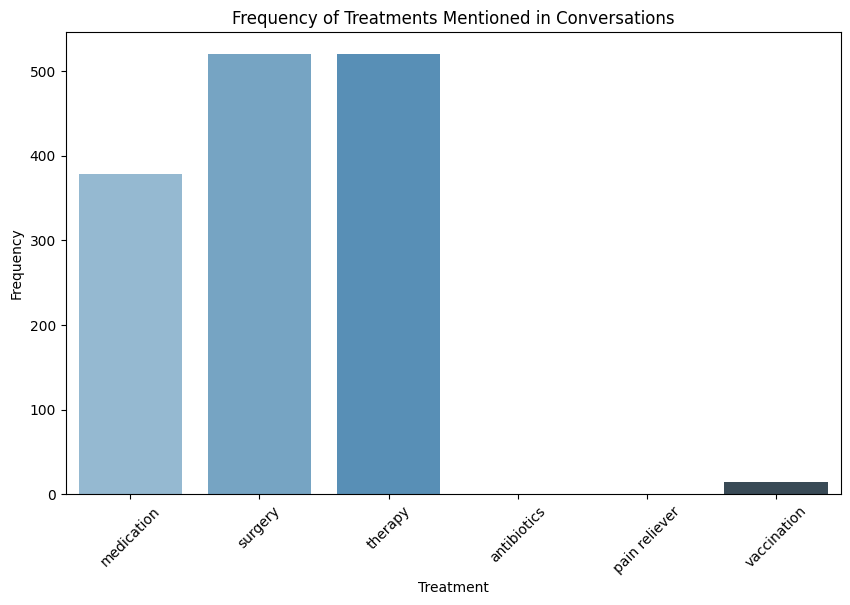

In [ ]:
# Define a list of known treatments
known_treatments = ['medication', 'surgery', 'therapy', 'antibiotics', 'pain reliever', 'vaccination']

# Count the occurrence of these treatments in the 'clean_data' and 'clean_conversation' columns
treatment_counts = {treatment: df['clean_data'].str.contains(treatment).sum() + df['clean_conversation'].str.contains(treatment).sum() for treatment in known_treatments}

# Convert the result into a DataFrame for visualization
treatment_df = pd.DataFrame(list(treatment_counts.items()), columns=['Treatment', 'Frequency'])

# Plot the frequency of treatments
plt.figure(figsize=(10,6))
sns.barplot(x='Treatment', y='Frequency', data=treatment_df, palette='Blues_d')
plt.title('Frequency of Treatments Mentioned in Conversations')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Sentiment Analysis

In [ ]:
from textblob import TextBlob

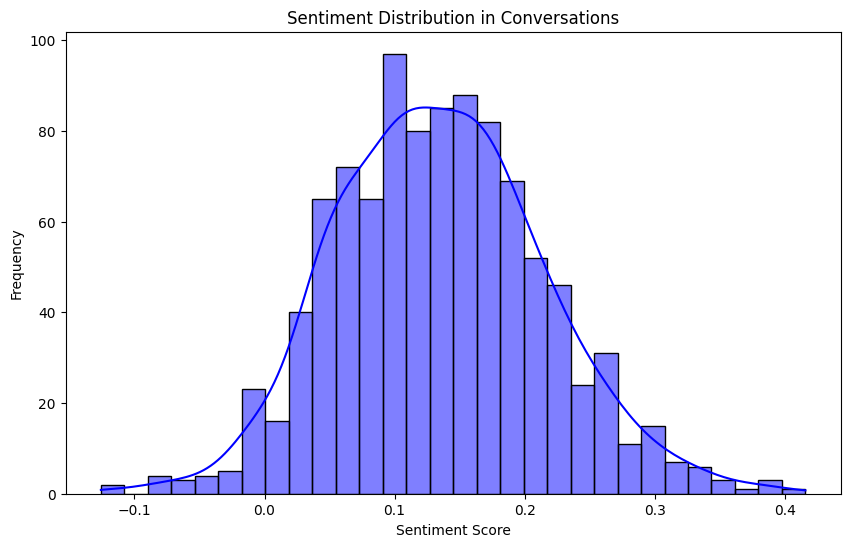

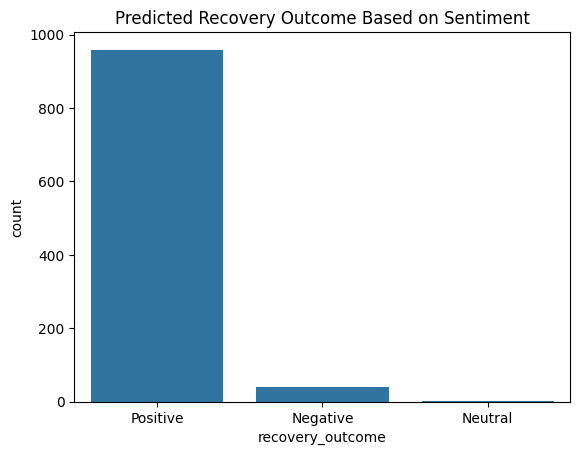

In [ ]:
#  sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'conversation' column
df['sentiment'] = df['clean_conversation'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], kde=True, color='blue', bins=30)
plt.title('Sentiment Distribution in Conversations')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#  sentiment to recovery outcomes
#  assume recovery outcome is inferred from sentiment (positive: good recovery, negative: poor recovery)
df['recovery_outcome'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Visualize the recovery outcomes based on sentiment
sns.countplot(x='recovery_outcome', data=df)
plt.title('Predicted Recovery Outcome Based on Sentiment')
plt.show()

Symptoms: We defined a list of common symptoms and counted how many times each appears in the cleaned text data (clean_data and clean_conversation). We visualized these using a bar plot.

Treatments: Similarly, we defined a list of common treatments and counted their occurrences. We then visualized them using another bar plot.

Recovery Outcomes: We used sentiment analysis to categorize the recovery_outcome as “Positive,” “Neutral,” or “Negative” and visualized the frequency of each category using a countplot.

Conclusion


The most common symptoms mentioned in the doctor-patient conversations.
The most frequent treatments discussed in the conversations.
The overall sentiment and how it relates to predicted recovery outcomes.